In [1]:
# 함수형 API를 사용하는 방법

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# 1) 컬럼명 정의
cols = [
    "area", "perimeter", "compactness",
    "length", "width", "asymmetry", "groove_length",
    "target"
]

In [4]:
# 2) seeds_dataset 로드
df = pd.read_csv('./seeds_dataset.txt', sep=r"\s+", names=cols)

# 3) 특성(X)과 레이블(y) 분리
X = df.drop("target", axis=1).values      # shape (210, 7)
y = df["target"].values - 1               # 원래 1,2,3 → 0,1,2

# 4) 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
# 5) 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [6]:
# 6) 텐서 변환
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test  = tf.convert_to_tensor(X_test,  dtype=tf.float32)
y_test  = tf.convert_to_tensor(y_test,  dtype=tf.int32)

In [7]:
# 7) Functional API 모델 정의
inputs     = Input(shape=(7,), name="input")                  # 7개 피처
x          = Dense(units=16, activation='relu', name="h1")(inputs)
x          = Dense(units=8,  activation='relu', name="h2")(x)
prediction = Dense(units=3,  activation='softmax', name="out")(x)

model = Model(inputs=inputs, outputs=prediction, name="seeds_func")

In [8]:
# 8) 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
# 9) 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.2021 - loss: 1.1946 - val_accuracy: 0.2353 - val_loss: 1.1623
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2853 - loss: 1.1119 - val_accuracy: 0.3529 - val_loss: 1.0732
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3412 - loss: 1.0393 - val_accuracy: 0.4706 - val_loss: 0.9887
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5195 - loss: 0.9515 - val_accuracy: 0.5294 - val_loss: 0.9138
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6283 - loss: 0.8909 - val_accuracy: 0.6471 - val_loss: 0.8488
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7183 - loss: 0.8332 - val_accuracy: 0.7941 - val_loss: 0.7931
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7924 - loss: 0.7981 - val_accuracy: 0.8529 - val_loss: 0.7452
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8654 - loss: 0.7307 - val_accuracy: 0.8824 - val_loss: 0.7048

>>> 전체 손실(loss): 0.2982
>>> 전체 정확도(accuracy): 0.8571

=== Classification Report ===
              precision    recall  f1-score   support

           0     1.0000    0.5714    0.7273        14
           1     0.8235    1.0000    0.9032        14
           2     0.8235    1.0000    0.9032        14

    accuracy                         0.8571        42
   macro avg     0.8824    0.8571    0.8446        42
weighted avg     0.8824    0.8571    0.8446        42

=== Confusion Matrix ===
[[ 8  3  3]
 [ 0 14  0]
 [ 0  0 14]]


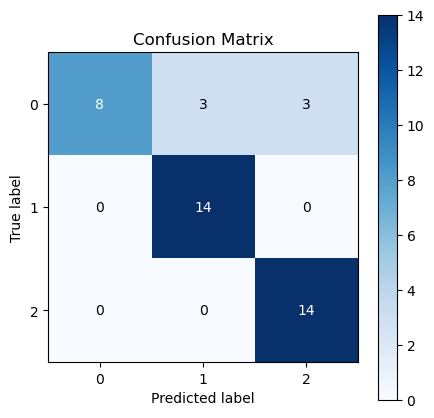

In [21]:
# 1) 기본 평가: loss, accuracy
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f">>> 전체 손실(loss): {loss:.4f}")
print(f">>> 전체 정확도(accuracy): {acc:.4f}")

# 2) 예측 수행: 확률 → 클래스 라벨
y_prob = model.predict(X_test, verbose=0)         # shape: (N, 3)
y_pred = np.argmax(y_prob, axis=1)                # 가장 높은 확률 인덱스를 예측 클래스라벨로

# 3) 클래스별 리포트 출력
#    - precision, recall, f1-score, support(샘플 수)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# 4) 혼동 행렬 출력
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5) (선택) 혼동 행렬을 시각화하려면 matplotlib만 사용
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=[0,1,2],    # 클래스 라벨
    yticklabels=[0,1,2],
    ylabel='True label',
    xlabel='Predicted label',
    title='Confusion Matrix'
)
plt.colorbar(im, ax=ax)
# 각 셀에 숫자 표시
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
plt.show()